# Duck Segmentation

This project builds an ML model that performs segmentation on the images that contain ducks.

The architecture used for segmentatic segmention is YOLO (YOLOv8).

---

## Image Labelling

This image labelling tool used is: CVAT.

For segmentation, the annotator used is primarily polygons, with coordinates available to download.

<img src='snapshots/image-annotation.png' width='70%' height='auto' />

With this, the **binary mask** is created for the respected image.

<img src='label_samples/masks/00eb7860432c771a.png' width='50%' height='auto' />

However, **label coordinates** are required for **YOLOv8**.

### From binary mask to label coordinates

In [19]:
import os
import cv2

mask_dir = os.path.join('.', 'label_samples', 'masks')
label_dir = os.path.join('.', 'label_samples', 'labels')

for file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, file)
    
    # Load binary mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
    
    mask_h, mask_w = mask.shape
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Converting contours to coordinates (polygons)
    coordinates = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 200:
            coordinate = []
            for point in cnt:
                x, y = point[0]
                coordinate.append(x / mask_w)
                coordinate.append(y / mask_h)
            coordinates.append(coordinate)
            
    # Printing coordinates
    with open('{}.txt'.format(os.path.join(label_dir, file)[:-4]), 'w') as f:
        for coordinate in coordinates:
            for p_, p in enumerate(coordinate):
                if p_ == len(coordinate) - 1:
                    f.write('{}\n'.format(p))
                elif p_ == 0:
                    f.write('0 {} '.format(p))
                else:
                    f.write('{} '.format(p))

        f.close()

---

## Data preprocessing

The data structure for this project is:
* data/
    * images/
        * train/
        * val/
    * labels/
        * train/
        * val/

---

## Loading a pretrained model

Performing transfer learning.

In [7]:
%%writefile config.yaml
path: D:\Personal\Projects\images\computer-vision\duck-segmentation # data path
train: images/train
val: images/val

nc: 1 # number of classes
names: ['duck'] # lass label

Overwriting config.yaml


---

## Training the model (Transfer Learning)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt') # Loading pretrained model

model.train(data='config.yaml', epochs=10, imgsz=640) # Training pretrained model

Ultralytics YOLOv8.0.213 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/gdrive/MyDrive/Personal/Projects/computer-vision/duck-segmentation/config-colab.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No

train: Scanning /content/gdrive/MyDrive/Personal/Projects/computer-vision/duck-segmentation/data/labels/train.cache... 3965 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3965/3965 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Personal/Projects/computer-vision/duck-segmentation/data/labels/val.cache... 189 images, 0 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.38G      1.067      1.916      2.479      1.277         13        640: 100%|██████████| 248/248 [02:55<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


                   all        189        201      0.581      0.662      0.557      0.338      0.592      0.667      0.565      0.354

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.28G      1.236      2.058       1.83      1.396         14        640: 100%|██████████| 248/248 [02:48<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]


                   all        189        201      0.653      0.694       0.67      0.441      0.628      0.701      0.662      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.28G      1.225      2.052      1.591       1.39         16        640: 100%|██████████| 248/248 [02:48<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        189        201      0.692      0.694      0.716       0.49      0.719      0.677       0.72      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.27G      1.151      1.968       1.45      1.336         13        640: 100%|██████████| 248/248 [02:49<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        189        201      0.679      0.677      0.656       0.44      0.602      0.602      0.567       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.27G      1.097      1.933      1.375      1.303         13        640: 100%|██████████| 248/248 [02:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        189        201      0.749      0.687      0.736      0.527      0.746      0.682      0.727      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.27G      1.027      1.818       1.28      1.246         13        640: 100%|██████████| 248/248 [02:50<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        189        201      0.681      0.776      0.761      0.542      0.698      0.747      0.759      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.27G     0.9728      1.744       1.22      1.217         14        640: 100%|██████████| 248/248 [02:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        189        201      0.692      0.811      0.793      0.618      0.728      0.776       0.79      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.27G      0.923      1.593      1.162      1.185         13        640: 100%|██████████| 248/248 [02:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        189        201       0.76      0.746      0.822      0.633      0.765      0.751      0.823      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.27G     0.8699      1.522      1.089      1.139         13        640: 100%|██████████| 248/248 [02:52<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        189        201      0.728      0.841      0.834      0.675      0.724      0.836      0.833      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.27G     0.8175      1.435      1.042      1.107         13        640: 100%|██████████| 248/248 [02:51<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        189        201      0.732       0.83       0.85      0.683      0.736      0.831      0.855      0.678



10 epochs completed in 0.497 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.0.213 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


                   all        189        201      0.732       0.83       0.85      0.683      0.736      0.831      0.855      0.678
Speed: 1.3ms preprocess, 4.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/segment/train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78a0dc3e5420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

The outcome results from YOLOv8 are stored in `runs/`.

---

### Making Predictions using the Trained Model

In [13]:
from ultralytics import YOLO
import os
import cv2
from pathlib import Path
import shutil

model_path = os.path.join('.', 'runs', 'segment', 'train', 'weights', 'last.pt')
image_path = 'D:/Personal/Projects/images/computer-vision/duck-segmentation/images/val/7846c34dc0564b10.png'
output_dir = Path(os.path.join('.', 'output'))

if output_dir.exists():
    shutil.rmtree(output_dir)
    
if not output_dir.is_dir():
    output_dir.mkdir(parents=True, exist_ok=True)


img = cv2.imread(image_path)
cv2.imwrite(os.path.join(output_dir, 'original_img.png'), img)

H, W, C = img.shape

model = YOLO(model_path)

results = model(img)

for result in results:
    for i, mask in enumerate(result.masks.data):
        mask = mask.to('cpu')
        mask = mask.numpy()*255
        mask = cv2.resize(mask, (W, H))
        cv2.imwrite(os.path.join(output_dir, 'output_mask.png'), mask)


0: 480x640 3 ducks, 29.0ms
Speed: 3.0ms preprocess, 29.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


### Predicted Outcome

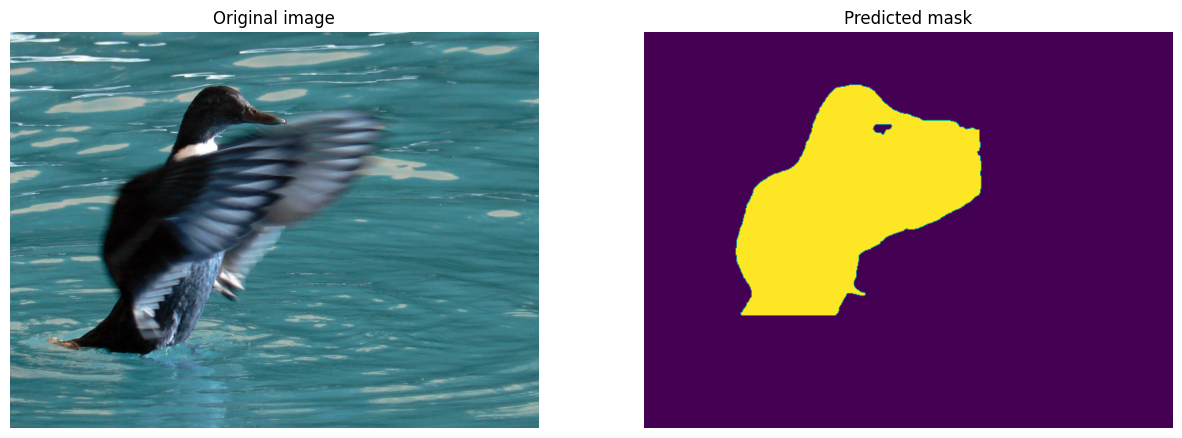

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Original image')
plt.axis(False)
plt.imshow(img);

plt.subplot(1, 2, 2)
plt.title('Predicted mask')
plt.axis(False)
plt.imshow(mask);